In [1]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

import os

import math

from PIL import Image

from skimage.feature import match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
from skimage.transform import AffineTransform


## Don't forget to run feature extraction before running this script
```python extract_features.py --image_list_file image_list_qualitative.txt```

### Change the pair index here (possible values: 1, 2 or 3)

In [2]:
pair_idx = 1
# 4 +ou-
# 6 mauvais
# 7 bien
# 12 mauvais
assert(pair_idx in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17,18,19,20])

### Loading the features

In [3]:
pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

In [4]:
image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

In [5]:
feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

### Mutual nearest neighbors matching

In [6]:
matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)

In [7]:
print('Number of raw matches: %d.' % matches.shape[0])

Number of raw matches: 70.


In [8]:
# print(feat1['keypoints'])
# print(matches)
# print(matches.shape)
# print(feat1['keypoints'][matches[:, 0], : 2])

### Homography fitting

In [9]:
keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model1, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

Number of inliers: 6.


In [10]:
# print(keypoints_left)
# print(keypoints_right)

### Plotting

In [11]:
inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image3 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

In [12]:
# print(inlier_keypoints_left)

In [13]:
pair_idx = pair_idx+1
print(pair_idx)

pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
print('Number of raw matches: %d.' % matches.shape[0])

keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model2, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image4 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)


2
Number of raw matches: 77.
Number of inliers: 46.


In [14]:
pair_idx = pair_idx+1
print(pair_idx)

pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
print('Number of raw matches: %d.' % matches.shape[0])

keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model3, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image5 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

3
Number of raw matches: 67.
Number of inliers: 4.


In [15]:
pair_idx = pair_idx+1

pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
print('Number of raw matches: %d.' % matches.shape[0])

keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model4, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image6 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

Number of raw matches: 69.
Number of inliers: 6.


In [16]:
print(model1.params)
print('Transltation : (',model1.params[0,2],',', model1.params[1,2],')')
print('Rotation : ', -np.angle(model1.params[0,0]+model1.params[1,0]*1j)*180/np.pi)
print(model2.params)
print('Transltation : (',model2.params[0,2],',', model2.params[1,2],')')
print('Rotation : ', -np.angle(model2.params[0,0]+model2.params[1,0]*1j)*180/np.pi-270)
print(model3.params)
print('Transltation : (',model3.params[0,2],',', model3.params[1,2],')')
print('Rotation : ', -np.angle(model3.params[0,0]+model3.params[1,0]*1j)*180/np.pi-180)
print(model4.params)
print('Transltation : (',model4.params[0,2],',', model4.params[1,2],')')
print('Rotation : ', -np.angle(model4.params[0,0]+model4.params[1,0]*1j)*180/np.pi-90)

[[ 9.81814917e-01 -1.98217989e-02  3.36106350e+01]
 [ 3.27323947e-01  7.41673746e-01  1.13973619e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transltation : ( 33.610635015682135 , 113.9736188526162 )
Rotation :  -18.43769604633888
[[ 1.00136118 -0.00931957  1.60732546]
 [-0.00530711  1.02851221 -4.48523226]
 [ 0.          0.          1.        ]]
Transltation : ( 1.6073254649410558 , -4.4852322630006825 )
Rotation :  -269.6963409703052
[[-5.29336173e-02  4.94935170e-01  2.15918261e+02]
 [ 1.62600707e+00  5.71006429e-01 -2.26080105e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transltation : ( 215.91826063911577 , -226.0801046455283 )
Rotation :  -271.8645688630601
[[ 1.02704129e+00  5.93074940e-02 -1.22863877e+02]
 [ 8.22931184e-02  9.18745740e-01 -3.42927324e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transltation : ( -122.86387677534822 , -34.292732426817196 )
Rotation :  -94.58111716810902


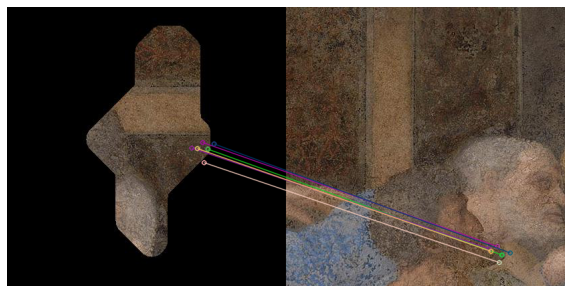

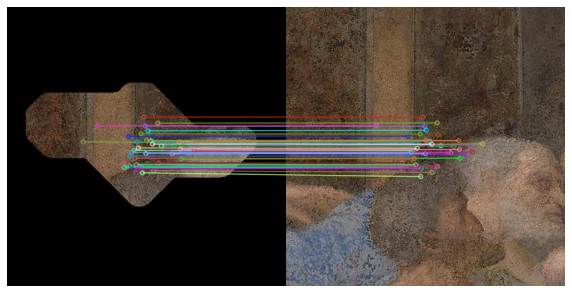

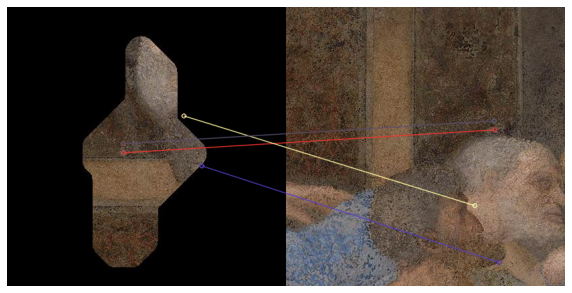

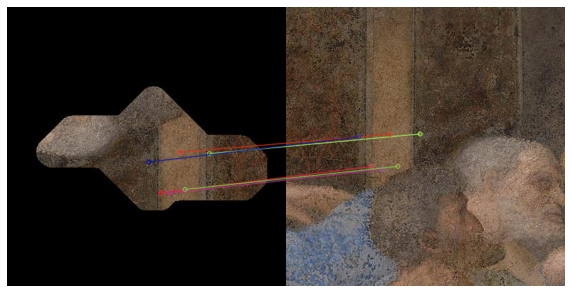

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(image3)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image4)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image5)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image6)
plt.axis('off')
plt.show()

In [18]:
# print('Rotation : ', np.angle(model1.params[0,0]+model1.params[1,0]*1j)*180/np.pi)